## pandas简介
处理表格数据神器<br>
- 读取/导出常见文本格式数据: csv,excel
- 数据处理: 过滤，分组，聚合
- 可视化（配合matplotlib, seaborn等）

## 1.导入

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

### pd.read_csv常用参数
- sep指定分隔符,默认','，其他常见分隔符:' ', '\t'
- header是否带表头, 默认True，读取第一行作为表头
- names给定表头，如果不带表头，可以自定义，传一个list作为参数

In [5]:
df = pd.read_csv('titanic_data.csv')
# df = pd.read_excel('titanic_data.xlsx',sheet_name='sheet1')

## 2.数据处理
### 2.1 基本统计函数

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- **Survived**：是否存活（0代表否，1代表是）
- **Pclass**：社会阶级（1代表上层阶级，2代表中层阶级，3代表底层阶级）
- **Name**：名字
- **Sex**：性别
- **Age**: 年龄
- **SibSp**：兄弟姐妹和配偶的数量
- **Parch**：父母以及小孩的数量
- **Ticket**：船票号
- **Fare**：船票价格
- **Cabin**： 座位号
- **Embarked**：上船的港口（C代表Cherbourg，Q代表Queenstown，S代表Southampton）

In [7]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df.shape

(891, 12)

In [9]:
print('数据有{}行，{}列'.format(df.shape[0],df.shape[1]))

数据有891行，12列


In [10]:
# 某一列每个取值的分布
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
# 某一列有多少种不同的取值？
df['Fare'].nunique()

248

In [12]:
# 某一列不同的取值有哪些
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### 2.2 过滤，分组，聚合，转换
- 过滤：关注某一部分数据
- 分组：具有相同属性的数据视为一个整体
- 聚合：分组后对每个整体做统计，多对一
- 转换：一个输入对应一个输出

In [13]:
df[df['Sex']=='female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


In [14]:
df[df['Age']>=30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S


In [15]:
df.groupby(['Sex','Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [16]:
# 数据透视表
df.pivot_table(index='Sex',columns='Pclass',aggfunc='mean',values='Age')

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [17]:
# 交叉表
pd.crosstab(index=df['Sex'],columns=df['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [18]:
df.groupby(['Sex'])['Age'].agg({'平均数':'mean','计数':'count'})

/Users/maerkesu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,平均数,计数
Sex,,
female,27.915709,261
male,30.726645,453


**lambda函数（匿名函数）**<br>
x表示被操作的元素，可能是一列中的一个元素，也可能是一整行或一整列

In [ ]:
def isAdult(x):
    if x>18:
        return 1
    else:
        return 0

In [ ]:
df['isAdult'] = df['Age'].map(isAdult(x))

In [19]:
df['isAdult'] = df['Age'].map(lambda x: 1 if x>18  else 0)

In [20]:
df['isAdult'].value_counts()

1    575
0    316
Name: isAdult, dtype: int64

In [21]:
df['Sex_Age'] = df.apply(lambda x: '{}_{}'.format(x['Sex'],x['Age']), axis=1)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isAdult,Sex_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,male_22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,female_38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,female_26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,female_35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,male_35.0


### 3. 可视化
- 需要用到什么数据？
- 数据结构是否匹配？

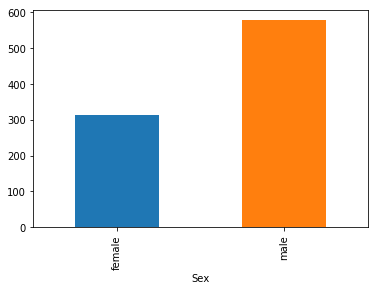

In [23]:
# 单维度对比
df.groupby(['Sex']).size().plot.bar()

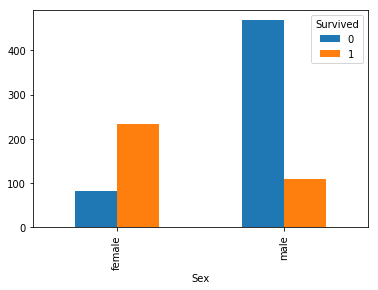

In [24]:
# 双维度对比
pd.crosstab(index=df['Sex'],columns=df['Survived']).plot.bar()

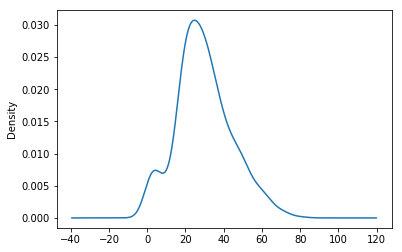

In [25]:
# 连续变量分布
df['Age'].plot.kde() 

**换一种方法也可以：调用方式灵活**

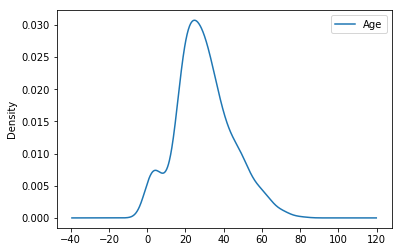

In [26]:
df.plot.kde(y='Age')

### 课后作业
1. 阅读pandas文档http://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html
2. 阅读seaborn可视化案例http://seaborn.pydata.org/examples/index.html